Project Week02

In [44]:
from scipy.stats import moment
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, lognorm
from scipy.optimize import minimize
from scipy.integrate import quad
import pandas as pd
import time
from tqdm import tqdm
import math
from datetime import datetime
from scipy.stats import ttest_1samp


- Problem 1 

Remember from last week we discussed that skewness and kurtosis functions in statistical packages are often biased. Is your function biased? Prove or disprove your hypothesis.

In [45]:
def first4Moments(sample, excess_kurtosis=True):
    # Calculate the raw moments
    mean_hat = moment(sample, moment=1)
    var_hat = moment(sample, moment=2, nan_policy='omit')

    # Calculate skewness and kurtosis without dividing
    skew_hat = moment(sample, moment=3)
    kurt_hat = moment(sample, moment=4)

    # Calculate excess kurtosis if excess_kurtosis is True, otherwise return regular kurtosis
    if excess_kurtosis:
        excessKurt_hat = kurt_hat - 3  # Excess kurtosis
        return mean_hat, var_hat, skew_hat, excessKurt_hat
    else:
        return mean_hat, var_hat, skew_hat, kurt_hat  # Regular kurtosis

In [46]:
# Create a standard normal distribution and set parameters for testing
mean = 0
std_dev = 1
known_kurtosis = 3
known_skew = 0
num_samples = 5000
sample_size = 5000

def calc_estimated_kurtosis(sample_size=sample_size):
    # Array to keep kurtosis values for 
    estimated_kurtosis_vals = []
    estimated_skew_vals = []

    # Test a new kurtosis for the number of sample distributions available
    for _ in tqdm(range(num_samples), desc="Generating Samples"):
        # Create random normal sample distribution
        sample = np.random.normal(mean, std_dev, sample_size)

        # Calculate kurtosis using your function (first4Moments)
        _, _, skew, kurtosis = first4Moments(sample, excess_kurtosis=False)

        estimated_kurtosis_vals.append(kurtosis)
        estimated_skew_vals.append(skew)

    # Average the estimated kurtosis using your function      
    averaged_estimated_kurtosis = np.mean(estimated_kurtosis_vals)
    averaged_estimated_skew = np.mean(estimated_skew_vals)
    return averaged_estimated_kurtosis, estimated_kurtosis_vals, averaged_estimated_skew, estimated_skew_vals

In [47]:
# Calculate the average estimated kurtosis
averaged_estimated_kurtosis, estimated_kurtosis_vals, averaged_estimated_skew, estimated_skew_vals = calc_estimated_kurtosis()

# Perform a one-sample t-test
t_stat1, p_value1 = ttest_1samp(estimated_kurtosis_vals, known_kurtosis)

# Compare the average estimated kurtosis to the known kurtosis
print(f"Known Kurtosis: {known_kurtosis}")
print(f"Average Estimated Kurtosis (Sample Size {sample_size}): {averaged_estimated_kurtosis}")

# Hypothesis test results
print(f"T-statistic: {t_stat1}")
print(f"P-value: {p_value1}")

# Check if the result is statistically significant (e.g., using a significance level of 0.05)
if p_value1 < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

# Perform a one-sample t-test
t_stat2, p_value2 = ttest_1samp(estimated_skew_vals, known_skew)

# Compare the average estimated kurtosis to the known kurtosis
print(f"Known Skew: {known_skew}")
print(f"Average Estimated Skew (Sample Size {sample_size}): {averaged_estimated_skew}")

# Hypothesis test results
print(f"T-statistic: {t_stat2}")
print(f"P-value: {p_value2}")

# Check if the result is statistically significant (e.g., using a significance level of 0.05)
if p_value1 < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

Generating Samples: 100%|██████████| 5000/5000 [00:02<00:00, 1865.40it/s]

Known Kurtosis: 3
Average Estimated Kurtosis (Sample Size 5000): 2.999016156551055
T-statistic: -0.4993997763419405
P-value: 0.6175197541552848
The difference is not statistically significant.
Known Skew: 0
Average Estimated Skew (Sample Size 5000): -0.00016946078494480733
T-statistic: -0.3442344217478139
P-value: 0.7306844766836584
The difference is not statistically significant.


- Problem 2

Fit the data in problem2.csv using OLS and calculate the error vector. Look at its distribution. How well does it fit the assumption of normally distributed errors?

Fit the data using MLE given the assumption of normality. Then fit the MLE using the assumption of a T distribution of the errors. Which is the best fit?

What are the fitted parameters of each and how do they compare? What does this tell us about the breaking of the normality assumption in regards to expected values in this case?


In [48]:
data = pd.read_csv("/Users/ahmedibrahim/Desktop/Mids/Fall24/Quantitative Risk Management/exam prep/try_juhas/week02_answers/problem2.csv")
data.head()

,x,y
0,-1.614399,-1.695691
1,-0.900999,0.409843
2,-0.170662,1.043979
3,2.097252,2.708814
4,0.140208,0.052374


- Problem 2: part 1 

Fit the data in problem2.csv using OLS and calculate the error vector. Look at its distribution. How well does it fit the assumption of normally distributed errors?

Performing OLS
------------------------------------------------------------


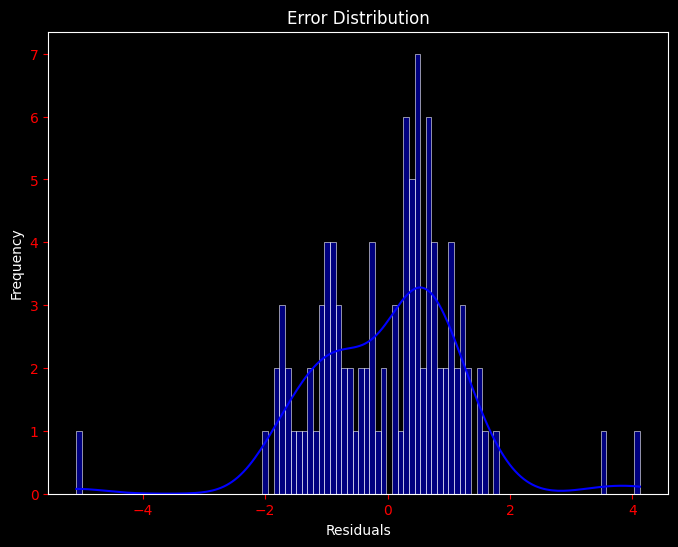

Error Vector:  0    -0.838485
1     0.835296
2     1.027428
3     1.319711
4    -0.152317
        ...   
95   -1.590264
96   -1.694848
97    0.434878
98    0.402261
99   -0.922319
Length: 100, dtype: float64
Averaged Error Vector:  -1.6653345369377347e-17
Variance Error Vector:  1.436148485406261


0    -0.838485
1     0.835296
2     1.027428
3     1.319711
4    -0.152317
        ...   
95   -1.590264
96   -1.694848
97    0.434878
98    0.402261
99   -0.922319
Length: 100, dtype: float64

In [49]:
def perform_ols(X, y, visualize_error=False):
    # Add a constant term to X matrix for the intercept
    X = sm.add_constant(X)
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    # Calculate error vector
    error_vector = model.resid
    
    # visualize error if desired
    if visualize_error:
        # Visualize the error distribution
        plt.figure(figsize=(8, 6))
        sns.histplot(error_vector, kde=True, color='blue', bins=100)
        plt.title("Error Distribution")
        plt.xlabel("Residuals")
        plt.ylabel("Frequency")
        plt.show()
    
    print("Error Vector: ", error_vector)
    averaged_error_vector = np.mean(error_vector)
    print("Averaged Error Vector: ", averaged_error_vector)
    variance_error_vector = np.var(error_vector)
    print("Variance Error Vector: ", variance_error_vector)
    return error_vector


X = data['x']
y = data['y']

print("Performing OLS")
print("------------------------------------------------------------")
perform_ols(X, y, True)

- Problem 2: part 2

Fit the data using MLE given the assumption of normality. Then fit the MLE using the assumption of a T distribution of the errors. Which is the best fit?

In [51]:
def mle_normal_distribution(X, y, perform_hypothesis_test = False):
    # Define the likelihood function for the normal distribution
    def log_likelihood(mean, var, X):
        # Number of values in X
        n = len(X)
        # Adjust x to be centered around the mean
        adjusted_X = X - mean
        # Get squared variance
        var2 = var**2
        # Calculate log likelihood
        log_likeli = -(n/2) * np.log(var2 * 2 * np.pi) - np.dot(adjusted_X, adjusted_X) / (2 * var2)

        return -log_likeli

    # Calculate initial guess for mean and standard deviation
    mean_guess = np.mean(y)
    std_dev_guess = np.std(y)

    # Initial guess for optimization
    initial_params = [mean_guess, std_dev_guess]

    # Perform optimization through minimization of log likelihood
    result = minimize(lambda params: log_likelihood(params[0], params[1], X), initial_params)

    # Extract optimized parameters
    optimized_mean, optimized_std_dev = result.x
    
    # Print optimized mean and standard deviation
    print("Optimized Mean:", optimized_mean)
    print("Optimized Standard Deviation:", optimized_std_dev)

    # Perform hypothesis test if specified
    if perform_hypothesis_test:
        # Calculate test statistic and p-value against standard normal (0, 1)
        test_statistic = (optimized_mean - 0) / optimized_std_dev  # Z-score
        p_value = 2 * (1 - norm.cdf(abs(test_statistic)))  # Two-tailed test

        # Determine if the null hypothesis (X is from a standard normal distribution) is rejected
        reject_null = p_value < 0.05  # Using a significance level of 0.05

        # Print hypothesis test results
        print("Test Statistic:", test_statistic)
        print("P-Value:", p_value)
        print("Reject Null Hypothesis:", reject_null)

    

    return optimized_mean, optimized_std_dev

def mle_t_distribution(X, y, perform_hypothesis_test=False):
    # Define the likelihood function for the t-distribution
    def log_likelihood(mean, var, df, X):
        adjusted_X = X - mean
        var2 = var**2
        log_likeli = np.sum(t.logpdf(adjusted_X / np.sqrt(var2), df))
        return -log_likeli

    # Calculate initial guess for mean, standard deviation, and degrees of freedom
    mean_guess = np.mean(y)
    std_dev_guess = np.std(y)
    df_guess = len(X)-1  # You can adjust the initial guess for degrees of freedom

    # Initial guess for optimization
    initial_params = [mean_guess, std_dev_guess, df_guess]

    # Perform optimization through minimization of log likelihood
    result = minimize(lambda params: log_likelihood(params[0], params[1], params[2], X), initial_params)

    # Extract optimized parameters
    optimized_mean, optimized_std_dev, optimized_df = result.x

    # Print optimized parameters
    print("Optimized Mean:", optimized_mean)
    print("Optimized Standard Deviation:", optimized_std_dev)
    print("Optimized Degrees of Freedom:", optimized_df)

    # Perform hypothesis test if specified
    if perform_hypothesis_test:
        # Calculate test statistic and p-value against standard t-distribution (0, 1, df)
        test_statistic = (optimized_mean - 0) / (optimized_std_dev / np.sqrt(optimized_df))
        p_value = 2 * (1 - t.cdf(abs(test_statistic), df=optimized_df))  # Two-tailed test

        # Determine if the null hypothesis (X is from a standard t-distribution) is rejected
        reject_null = p_value < 0.05  # Using a significance level of 0.05

        # Print hypothesis test results
        print("Test Statistic:", test_statistic)
        print("P-Value:", p_value)
        print("Reject Null Hypothesis:", reject_null)


print("Performing MLE for Normal Distribution")
print("------------------------------------------------------------")
mle_normal_distribution(X, y, True)

print("Performing MLE for t Distribution")
print("------------------------------------------------------------")
mle_t_distribution(X, y, True)

Performing MLE for Normal Distribution
------------------------------------------------------------
Optimized Mean: -0.00010751801856515355
Optimized Standard Deviation: 0.9734589762688727
Test Statistic: -0.00011044946031239503
P-Value: 0.9999118740810469
Reject Null Hypothesis: False
Performing MLE for t Distribution
------------------------------------------------------------
Optimized Mean: -33.04529353071535
Optimized Standard Deviation: 6431.799013355645
Optimized Degrees of Freedom: 330.891809676708
Test Statistic: -0.09345879085834749
P-Value: 0.9255956490056976
Reject Null Hypothesis: False


- Problem 3

Simulate AR(1) through AR(3) and MA(1) through MA(3) processes. Compare their ACF and PACF graphs. How do the graphs help us to identify the type and order of each process?

MA(N) process and AR(N) process, where N = 1, 2, 3

In [20]:
def simulate_MA(N, num_steps, e, burn_in, mean, plot_y = False, max_threshold = 1e4):

    # Initialize y MA preds
    y = np.empty(num_steps)

    # Simulate the MA(N) process
    for i in range(1, num_steps + burn_in):
        y_t = mean + np.sum([0.05 * e[i - j] for j in range(1, N + 1)]) + e[i]
        if i > burn_in:
            # Check if y_t is beyond a certain threshold
            if abs(y_t) > max_threshold:
                y_t = np.sign(y_t) * mean
            y[i - burn_in - 1] = y_t

    # Calculate the mean and variance only for the non-burn-in period
    mean_y = np.mean(y)
    var_y = np.var(y)
    print(f"Mean of Y: {mean_y:.4f}")
    print(f"Var of Y: {var_y:.4f}")

    if plot_y == True:
        # Plot the time series
        plt.figure(figsize=(10, 4))
        plt.plot(y)
        plt.title(f"MA({N}) Time Series")
        plt.xlabel("Timestep")
        plt.ylabel("Y")
        # plt.savefig(f'plots/MA_{N}_Steps.png')
        plt.show()


    return y, mean_y, var_y


def simulate_AR(N, num_steps, e, burn_in, mean, plot_y=True):
    # Initialize variables
    n = num_steps
    y = np.empty(n)

    # Simulate the AR(N) process
    for i in range(n + burn_in):
        y_t = mean  # Initialize y_t to the mean

        # Compute the AR(N) value for y_t
        for j in range(1, N + 1):
            if i - j >= 0:
                y_t += 0.5 ** j * y[i - j - burn_in] # take a look at removing the burn in

        # Add the white noise
        y_t += e[i]

        # Store the value in the y array if not in the burn-in period
        if i >= burn_in:
            y[i - burn_in] = y_t

    # Optionally plot the time series
    if plot_y:
        plt.figure(figsize=(10, 4))
        plt.plot(y)
        plt.title(f"AR({N}) Time Series")
        plt.xlabel("Timestep")
        plt.ylabel("Y")
        # plt.savefig(f'plots/AR_{N}_Steps.png')
        plt.show()


    # Calculate the mean and variance only for the non-burn-in period
    mean_y = np.mean(y[burn_in:])
    var_y = np.var(y[burn_in:])
    print(f"Mean of Y: {mean_y:.4f}")
    print(f"Var of Y: {var_y:.4f}")

    return y, mean_y, var_y

Plotting ACF and PACF graphs for each process

In [22]:
def plot_acf_pacf(y, N, plot_type='AR', save_plots=False):
    # Set custom styling for the plots
    plt.style.use('dark_background')
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams['xtick.color'] = 'red'
    plt.rcParams['ytick.color'] = 'red'
    plt.rcParams['text.color'] = 'white'

    # Create a directory to save plots if it doesn't exist
    # if save_plots:
    #     import os
    #     if not os.path.exists('plots'):
    #         os.makedirs('plots')

    # Plot the ACF and PACF with red lines
    plt.figure(figsize=(12, 6))

    # ACF plot
    ax1 = plt.subplot(121)
    plot_acf(y, lags=40, ax=ax1, color='red')
    ax1.set_title("Autocorrelation Function (ACF)")

    # PACF plot
    ax2 = plt.subplot(122)
    plot_pacf(y, lags=40, ax=ax2, color='red')
    ax2.set_title("Partial Autocorrelation Function (PACF)")

    # Add an overall title including the plot_type
    plt.suptitle(f"{plot_type}({N}) - ACF and PACF Plots", color='white', fontsize=16)

    # plt.savefig(f'plots/{plot_type}_{N}_ACF_PACF.png')

    plt.tight_layout()

    # Display the plots
    plt.show()


Mean of Y: 0.0511
Var of Y: 0.9667


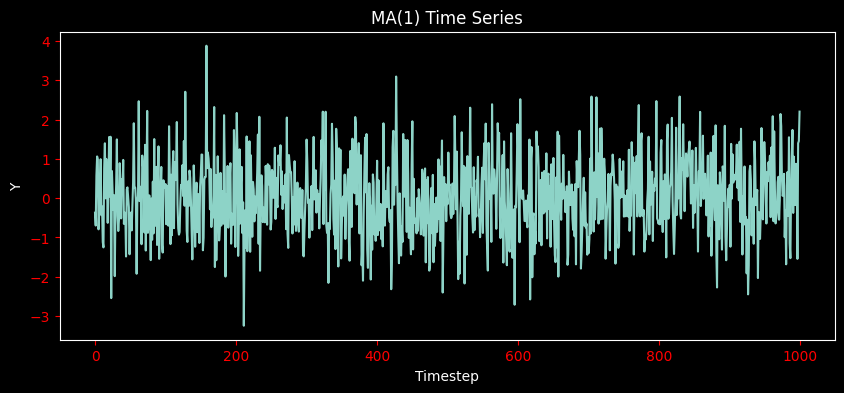

/Users/ahmedibrahim/opt/miniconda3/envs/ab/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


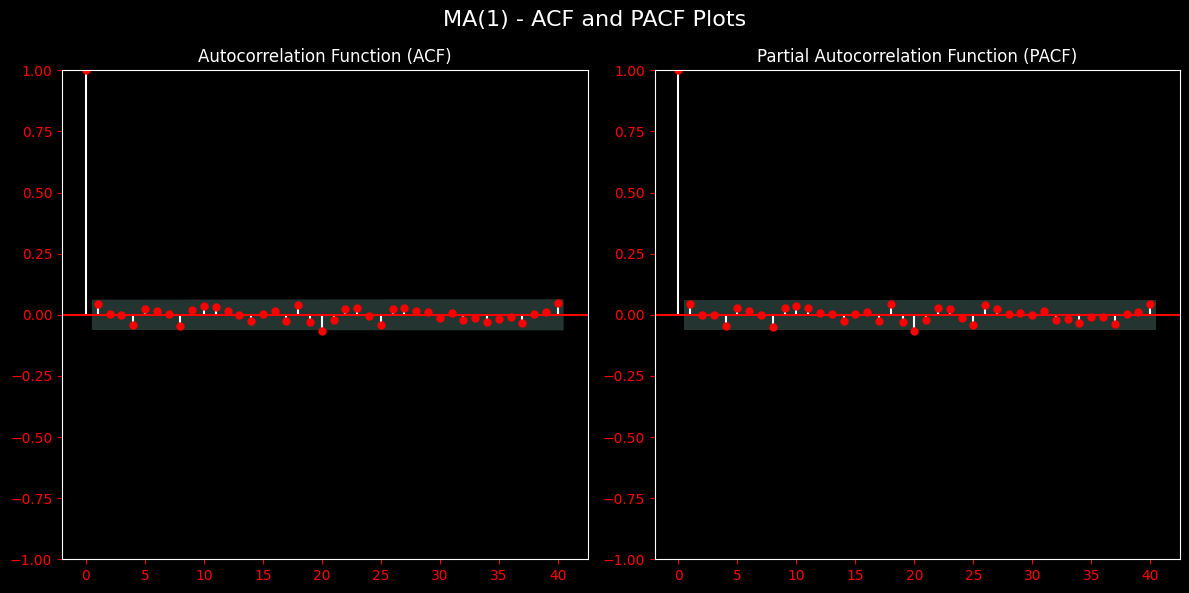

In [37]:
# Order of the MA process
N = 1
# Number of time steps
num_steps = 1000
# Burn-in period
burn_in = 50

# Generate normal white noise
mean = 0.0
std_dev = 1.0
np.random.seed(42)
#e = np.random.normal(mean, std_dev, num_steps + burn_in)
e = np.random.randn(num_steps+burn_in)

# Simulate the MA(N) process
y, mean_y, var_y = simulate_MA(N, num_steps, e, burn_in, mean, plot_y=True)
plot_acf_pacf(y, N, plot_type = "MA")

# Simulate the AR(N) process
#y, mean_y, var_y = fin_package.simulate_AR(N, num_steps, e, burn_in, mean, plot_y=True)
#fin_package.plot_acf_pacf(y, N, plot_type = "AR")

Mean of Y: 0.0527
Var of Y: 0.9669


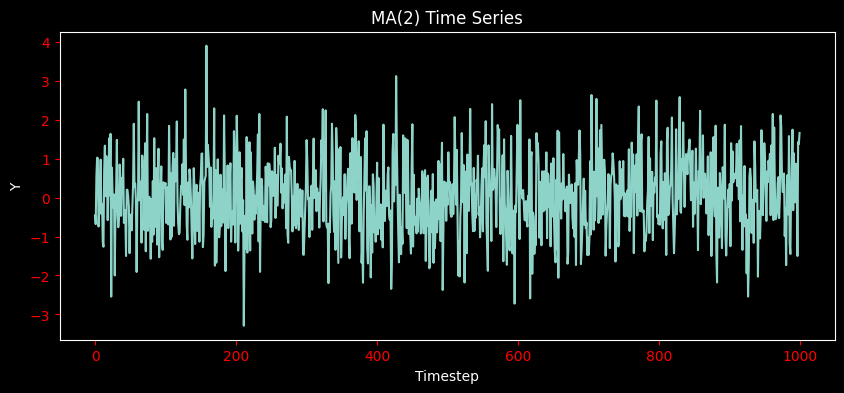

/Users/ahmedibrahim/opt/miniconda3/envs/ab/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


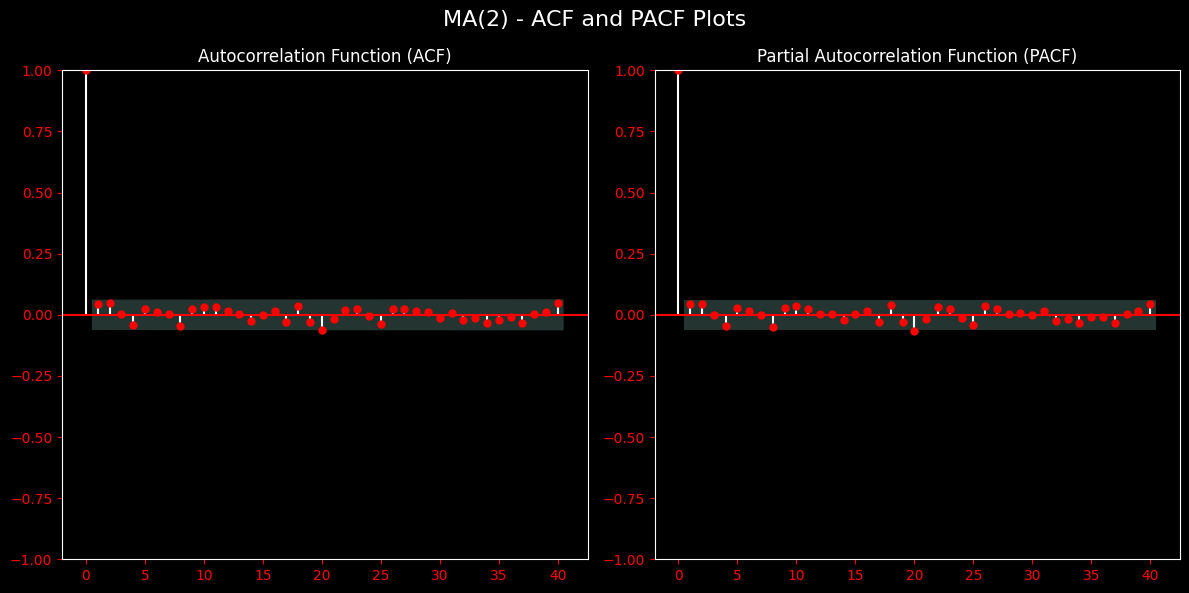

In [38]:
# Order of the MA process
N = 2
# Number of time steps
num_steps = 1000
# Burn-in period
burn_in = 50

# Generate normal white noise
mean = 0.0
std_dev = 1.0
np.random.seed(42)
#e = np.random.normal(mean, std_dev, num_steps + burn_in)
e = np.random.randn(num_steps+burn_in)

# Simulate the MA(N) process
y, mean_y, var_y = simulate_MA(N, num_steps, e, burn_in, mean, plot_y=True)
plot_acf_pacf(y, N, plot_type = "MA")

Mean of Y: 0.0532
Var of Y: 0.9674


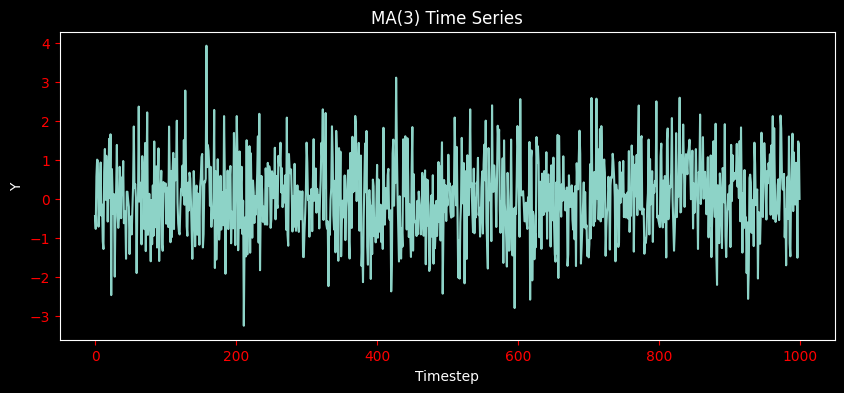

/Users/ahmedibrahim/opt/miniconda3/envs/ab/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


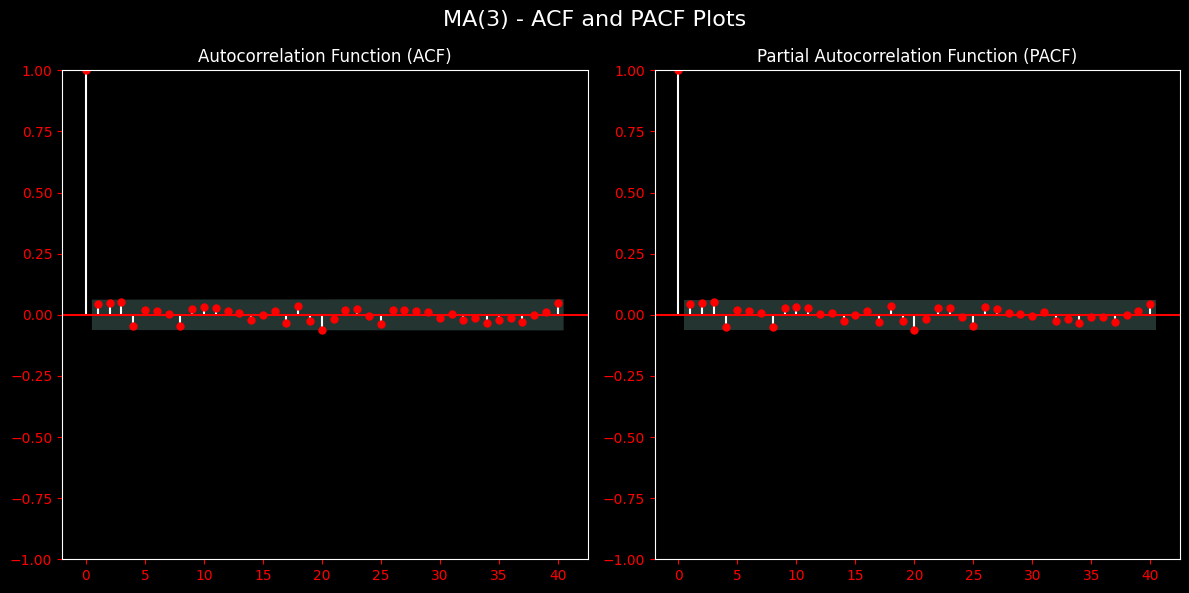

In [39]:
# Order of the MA process
N = 3
# Number of time steps
num_steps = 1000
# Burn-in period
burn_in = 50

# Generate normal white noise
mean = 0.0
std_dev = 1.0
np.random.seed(42)
#e = np.random.normal(mean, std_dev, num_steps + burn_in)
e = np.random.randn(num_steps+burn_in)

# Simulate the MA(N) process
y, mean_y, var_y = simulate_MA(N, num_steps, e, burn_in, mean, plot_y=True)
plot_acf_pacf(y, N, plot_type = "MA")

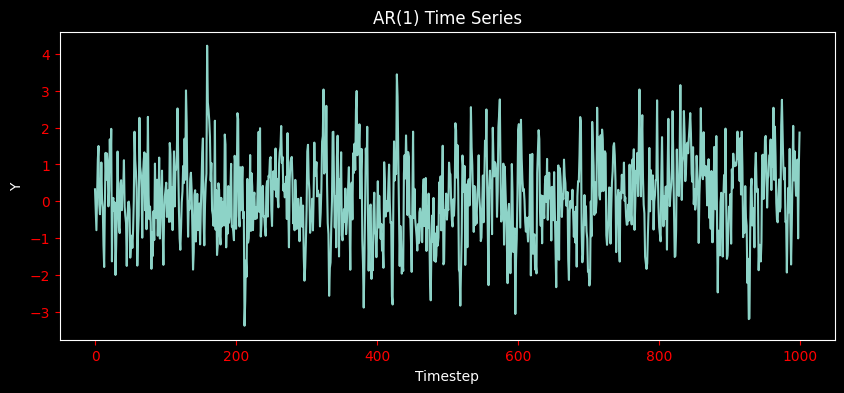

Mean of Y: 0.0948
Var of Y: 1.2883


/Users/ahmedibrahim/opt/miniconda3/envs/ab/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


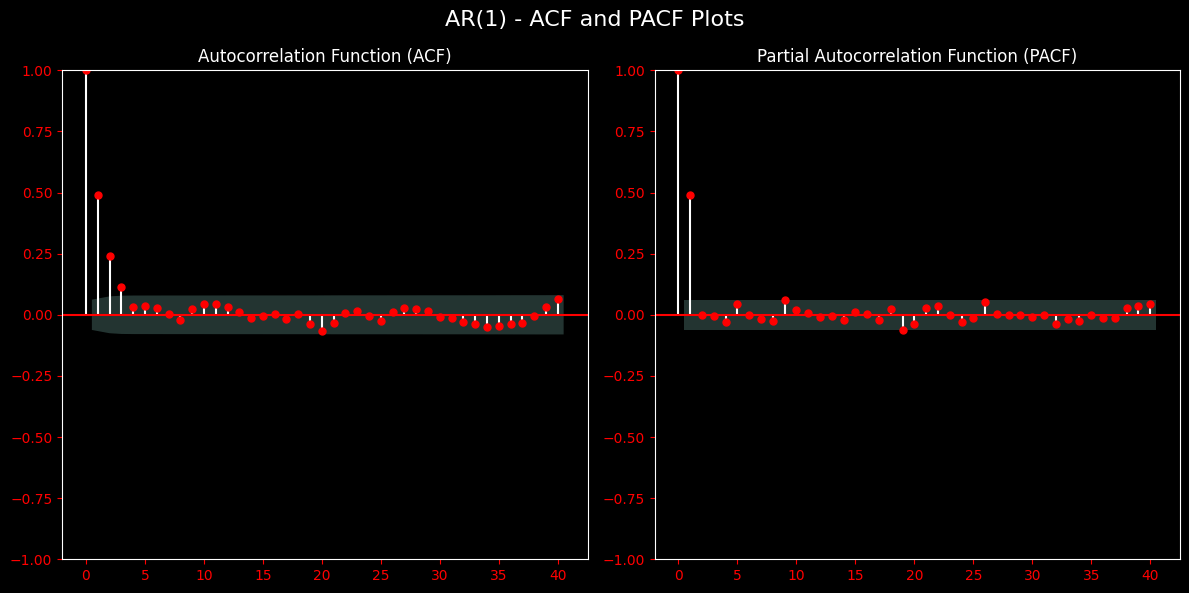

In [33]:
# Order of the MA process
N = 1
# Number of time steps
num_steps = 1000
# Burn-in period
burn_in = 50

# Generate normal white noise
mean = 0.0
std_dev = 1.0
np.random.seed(42)
#e = np.random.normal(mean, std_dev, num_steps + burn_in)
e = np.random.randn(num_steps+burn_in)

# Simulate the MA(N) process
# y, mean_y, var_y = simulate_MA(N, num_steps, e, burn_in, mean, plot_y=True)
# plot_acf_pacf(y, N, plot_type = "MA")

# Simulate the AR(N) process
y, mean_y, var_y = simulate_AR(N, num_steps, e, burn_in, mean, plot_y=True)
plot_acf_pacf(y, N, plot_type = "AR")

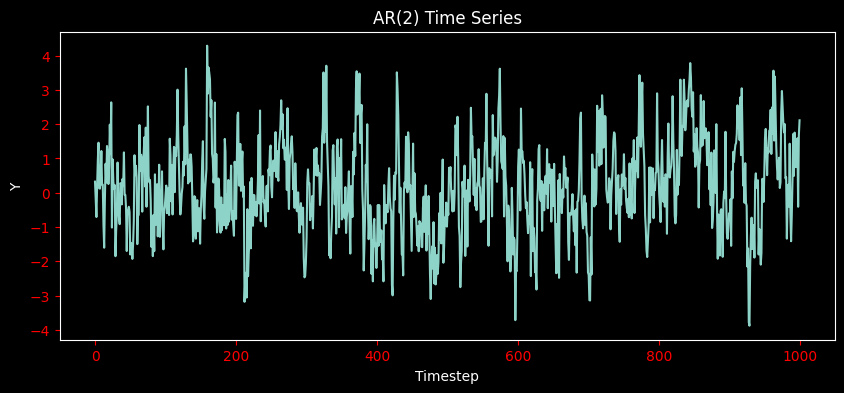

Mean of Y: 0.1834
Var of Y: 1.8527


/Users/ahmedibrahim/opt/miniconda3/envs/ab/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


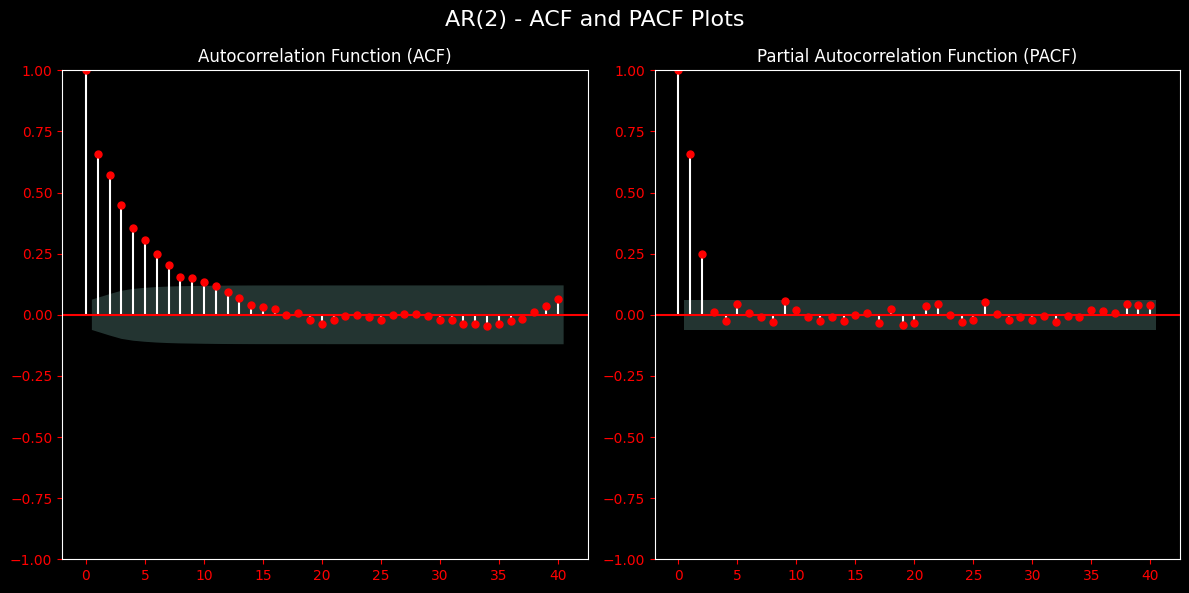

In [34]:
# Order of the MA process
N = 2
# Number of time steps
num_steps = 1000
# Burn-in period
burn_in = 50

# Generate normal white noise
mean = 0.0
std_dev = 1.0
np.random.seed(42)
#e = np.random.normal(mean, std_dev, num_steps + burn_in)
e = np.random.randn(num_steps+burn_in)

# Simulate the MA(N) process
# y, mean_y, var_y = simulate_MA(N, num_steps, e, burn_in, mean, plot_y=True)
# plot_acf_pacf(y, N, plot_type = "MA")

# Simulate the AR(N) process
y, mean_y, var_y = simulate_AR(N, num_steps, e, burn_in, mean, plot_y=True)
plot_acf_pacf(y, N, plot_type = "AR")

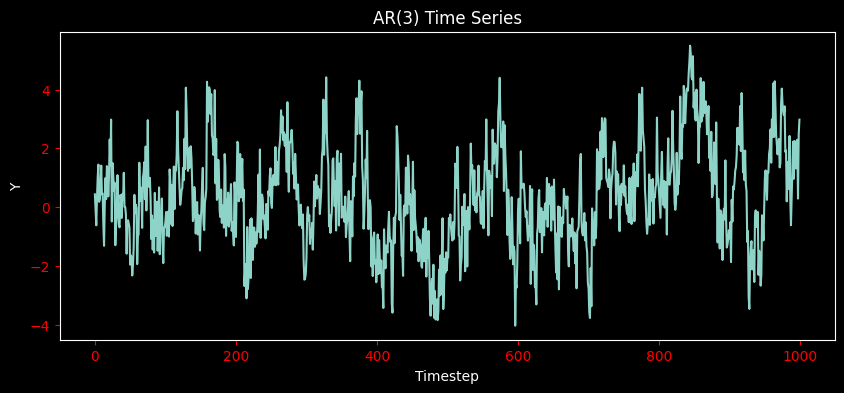

Mean of Y: 0.3506
Var of Y: 2.9198


/Users/ahmedibrahim/opt/miniconda3/envs/ab/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


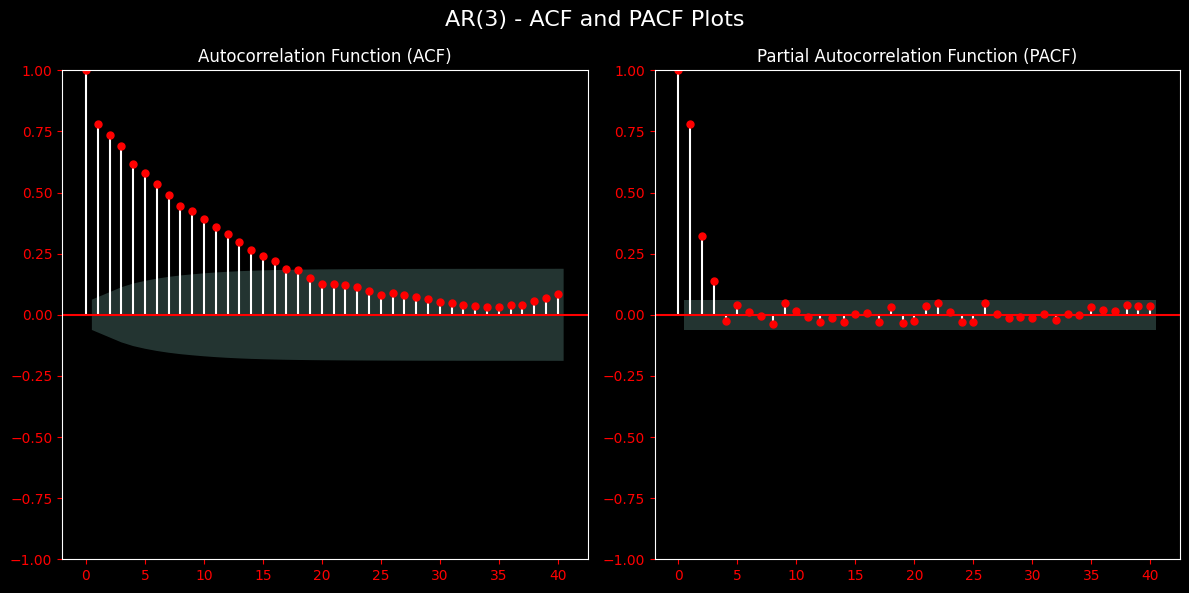

In [36]:
# Order of the MA process
N = 3
# Number of time steps
num_steps = 1000
# Burn-in period
burn_in = 50

# Generate normal white noise
mean = 0.0
std_dev = 1.0
np.random.seed(42)
#e = np.random.normal(mean, std_dev, num_steps + burn_in)
e = np.random.randn(num_steps+burn_in)

# Simulate the MA(N) process
# y, mean_y, var_y = simulate_MA(N, num_steps, e, burn_in, mean, plot_y=True)
# plot_acf_pacf(y, N, plot_type = "MA")

# Simulate the AR(N) process
y, mean_y, var_y = simulate_AR(N, num_steps, e, burn_in, mean, plot_y=True)
plot_acf_pacf(y, N, plot_type = "AR")